# K-Means Clustering(군집화)
- 비지도학습(Unsupervised Learning)의 대표적인 군집화(Clustering) 알고리즘
- 데이터를 K개의 클러스터로 묶고 각 클러스터는 데이터 포인트들의 유사성에 따라 형성
- 각 클러스터의 중심점과 데이터 포인트들 간의 거리를 기반으로 클러스터링을 수행
- 할당 단계와 업데이트 단계를 반복하면서 클러스터를 형성
- 최종 결과로는 데이터셋의 데이터가 각각 어떤 클러스터에 속하는지 결정

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

## 200개의 데이터 포인트로 구성된 가상의 클러스터링 데이터셋 `input_feature` 생성

In [2]:
input_feature, _ = make_blobs(n_samples=200, centers=2, cluster_std=0.5, random_state=30) #데이터, #중심값
# print(input_feature)
input_feature[:5]

array([[ 3.25996508, -6.62137997],
       [ 2.68090757, -1.87003254],
       [ 2.54961207, -2.3823171 ],
       [ 2.03248083, -6.97156632],
       [ 3.04871092, -2.1664995 ]])

## 코드 설명
1. `make_blobs(n_samples=200, centers=2, cluster_std=0.5, random_state=30)`

-  `make_blobs` 함수는 가상의 클러스터링 데이터셋을 생성하는 함수
- 주어진 매개변수에 따라 여러 개의 클러스터를 생성

- `n_samples`: 생성할 데이터 포인트(샘플)의 개수를 지정
- `centers`: 클러스터의 개수를 지정
- `cluster_std`: 클러스터 내 데이터의 표준 편차를 지정
- `random_state`: 랜덤 시드를 설정하여 데이터 생성의 재현성을 보장  
.

2. `input_feature[:5]`
- 생성된 데이터셋 `input_feature`의 처음 5개 데이터 포인트를 출력
-  2차원 배열로, 각 행은 2개의 특성으로 구성된 데이터 포인트를 나타냄


In [3]:
input_feature.shape

(200, 2)

---
## 2차원 데이터셋 시각화
- `input_feature` 데이터셋의 첫 번째 열을 x축으로, 두 번째 열을 y축으로 사용하여 데이터 포인트를 산점도로 표시

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


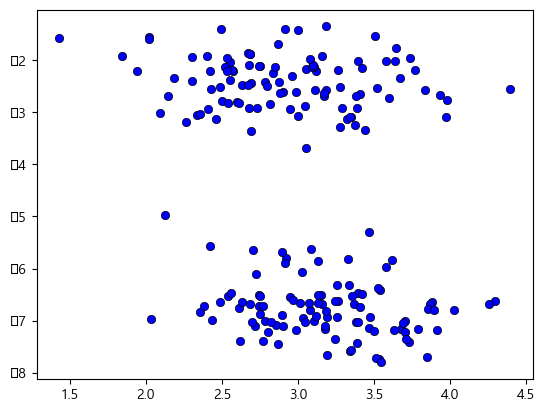

In [4]:
plt.scatter(input_feature[:, 0], input_feature[:, 1], c='blue', edgecolor='k', lw=0.5)
plt.show()

### 코드 설명
1. `plt.scatter(input_feature[:, 0], input_feature[:, 1], c='blue', edgecolor='k', lw=0.5)`:
- `plt.scatter` 산점도로 시각화
- `input_feature[:, 0]`: 데이터셋 `input_feature`의 첫 번째 열(특성)에 해당하는 데이터를 x축으로 사용
- `input_feature[:, 1]`: 데이터셋 `input_feature`의 두 번째 열(특성)에 해당하는 데이터를 y축으로 사용
- `c='blue'`: 데이터 포인트의 색상을 파란색(blue)으로 설정
- `edgecolor='k'`: 데이터 포인트의 테두리 색상을 검정색(black)으로 설정.
- `lw=0.5`: 데이터 포인트의 테두리 두께를 0.5로 설정  


>>

---

## KMeans (초기화 = random)

In [5]:
# 실습 코드 주피터에서 작동 안됨 -> 코랩에서 실행하기
model_r = KMeans(n_clusters=3, init="random").fit(input_feature)

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 코드 설명
1. `KMeans(n_clusters=3, init="random")`: `KMeans` 객체를 생성
- `n_clusters=3`: 생성할 클러스터의 개수를 3으로 설정
- `init="random"`: 초기 중심점을 랜덤하게 선택하여 K-Means 알고리즘을 시작 (다른 초기화 방법: `"k-means++"` 등)
.
2. `.fit(input_feature)`
- 생성한 `KMeans` 객체를 사용하여 데이터를 클러스터링
- `fit` 메서드를 호출하여 알고리즘 실행
- `input_feature`: 클러스터링할 데이터셋

---

Attributes of sklearn.clustering.KMeans

- cluster__centers_ : Coordinates of cluster centers

- labels_ : Labels of each point

- inertia_ : Sum of squared distances of samples to their closest cluster center.

- n__iter_ : Number of iterations run.

In [8]:
# center = np.zeros([3, 2])
center = model_r.cluster_centers_
center

array([[ 2.91383768, -2.41786968],
       [ 2.93505431, -6.38972461],
       [ 3.40304381, -7.13618921]])

In [7]:
c0 = center[0]
c1 = center[1]
c2 = center[2]

**그럼 이제, 데이터가 클러스터링된 결과를 시각화해서 확인해보자**  
.  
plt.scatter(cluster_0 에 속한 데이터만, 초록색(g)으로)  
plt.scatter(cluster_1 에 속한 데이터만, 빨간색(r)으로)  
plt.scatter(cluster_2 에 속한 데이터만, 파란색(b)으로)  
.  
plt.scatter(cluster_0 중심값, size는 200으로) # 기본값 = 100  
plt.scatter(cluster_1 중심값, size는 200으로) # 기본값 = 100  
plt.scatter(cluster_2 중심값, size는 200으로) # 기본값 = 100

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


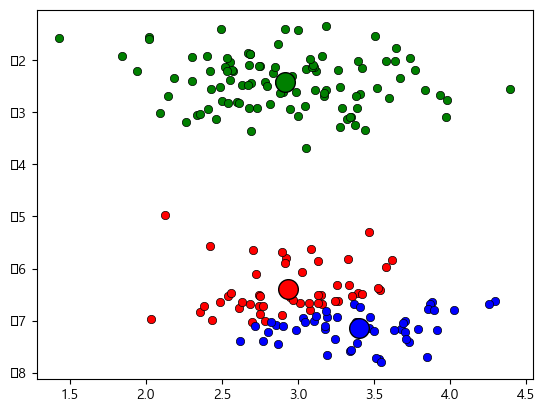

In [9]:
plt.scatter(input_feature[model_r.labels_ == 0, 0], input_feature[model_r.labels_ == 0, 1], marker='o', c='g', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_r.labels_ == 1, 0], input_feature[model_r.labels_ == 1, 1], marker='o', c='r', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_r.labels_ == 2, 0], input_feature[model_r.labels_ == 2, 1], marker='o', c='b', edgecolor='k', lw=0.5)
plt.scatter(c0[0], c0[1], s=200, c="g", edgecolor='k', lw=1)
plt.scatter(c1[0], c1[1], s=200, c="r", edgecolor='k', lw=1)
plt.scatter(c2[0], c2[1], s=200, c="b", edgecolor='k', lw=1)
plt.show()

## 초기화를 K-Means++로 수정해보자.

In [10]:
model_pp = KMeans(n_clusters=4, init="k-means++").fit(input_feature)

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


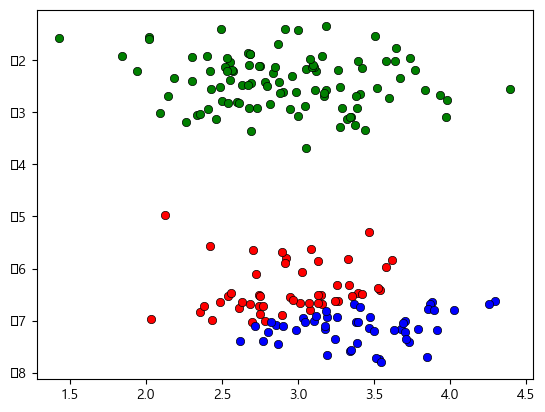

In [11]:
plt.scatter(input_feature[model_r.labels_ == 0, 0], input_feature[model_r.labels_ == 0, 1], marker='o', c='g', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_r.labels_ == 1, 0], input_feature[model_r.labels_ == 1, 1], marker='o', c='r', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_r.labels_ == 2, 0], input_feature[model_r.labels_ == 2, 1], marker='o', c='b', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_r.labels_ == 3, 0], input_feature[model_r.labels_ == 3, 1], marker='o', c='m', edgecolor='k', lw=0.5)
plt.show()

## K-Means의 적정 K를 판단하는 방법은 없을까?

K-Means는 처음에 클러스터의 갯수를 사람이 직접 설정해줘야하는 제약이 있다.  
그럼, 가장 적합한 K는 어떻게 판단할 수 있을까?

물론, 정성적으로 판단해서 정하기도 하지만,  
Sklearn에서 적정 K를 판단해주는 척도도 제공한다.

바로, 위에서 언급했던 Attributes 중 inertia_라는 값이다.

inertia = Sum of squared distances of samples to their closest cluster center(자신의 클러스터 중심점과 데이터(samples) 간의 거리의 합)

즉, 각 클러스터가 데이터와 중심점이 얼마나 가까이 붙어있는가를 의미하는 값이다.

중심점과 데이터가 가까이 붙어있을수록 클러스터의 응집도가 높다고 볼 수 있다.  
이 응집도를 클러스터의 평가 척도로 사용할 수 있다.

하지만, inertia 값은 본질 상, 클러스터가 커질수록 값이 작아지므로,  
클러스터 수에 대한 inertia값의 추세를 보고 적절한 K를 선택해야한다.


In [12]:
model_r.inertia_

83.4866995828344

그럼, K 를 바꿔보면서 inertia_값의 변화를 한번 살펴보자.

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

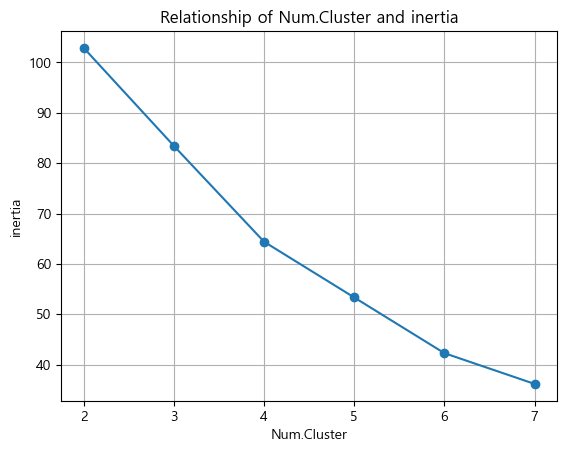

In [13]:
set_k = [k for k in range(2, 8)]
set_inertia = []
for k in set_k:
    model = KMeans(n_clusters=k)
    model.fit(input_feature)

    set_inertia.append(model.inertia_)

plt.plot(set_k, set_inertia, '-o')

plt.title('Relationship of Num.Cluster and inertia')
plt.xlabel('Num.Cluster')
plt.ylabel('inertia')
plt.xticks(set_k)
plt.grid()
plt.show()

## 데이터의 개수가 많으면, K-Means의 수행 시간은 어떻게 달라질까?

데이터가 매우 커지지 않는 이상, 큰 차이는 나지 않습니다.

**[잠깐! 상식]**  
코드 수행 시간을 체크할 때, 보통 time 패키지를 사용합니다.  
time.time() 은 해당 현재 시각을 반환해주는 함수로서,  
이 함수를 수행시간을 체크해볼 코드 앞뒤에 넣어서 시각의 차이를 계산함으로써, 수행시간을 체크합니다.

In [14]:
import time

start = time.time()
model_r = KMeans(n_clusters=3, init="random").fit(input_feature)
end = time.time()

end - start

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.0200040340423584

In [15]:
input_expended, _ = make_blobs(n_samples=200000, centers=1, cluster_std=0.5, random_state=30)

In [16]:
start = time.time()
model_r = KMeans(n_clusters=3, init="random").fit(input_expended)
end = time.time()

end - start

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.37781429290771484

## K-Means 외의 다른 Clustering 방법론은 뭐가 있을까?

기본적인 K-Means 외에도 K-Means를 보완한 버전의 모델이 여러가지 있습니다.
.
또한, K-Means와 다른 방식으로 클러스터링을 하는 모델도 여러가지 있습니다.
계층적클러스터링, DBSCAN, Spectral Clustering 등이 있습니다.


## 그럼, 이러한 다양한 선택지 가운데, 어떤 것을 선택해야 할까?

기본적으로 각 방법론마다 궁합(?)이 맞는 특정 데이터 조건들이 있습니다.

자세한 내용은 직접 페이지에 들어가서 살펴봅시다.  
https://scikit-learn.org/stable/modules/clustering.html